In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.svm import SVR

## Import Data

In [2]:
df=pd.read_csv("tested.csv")

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Check Dataset Size

In [4]:
df.shape

(418, 12)

## Find and treat missing values (If any)

In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [20]:
df.drop('Cabin', axis=1, inplace= True)

In [21]:
df.dropna(inplace=True)

In [7]:
for i in df.columns:
    print(i,df[i].sort_values().unique(),"\n",sep = "\n")

PassengerId
[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086

## Check column types and describe which columns are numerical or categorical

In [24]:
df.drop(['PassengerId','Name','Ticket'],axis=1, inplace=True)

In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [28]:
cat=[]
num=[]

for i in df.columns:
    if df[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)

In [29]:
cat

['Sex', 'Embarked']

In [30]:
num

['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

## Perform Univariate analysis

In [9]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [10]:
df.corr()

C:\Users\zamam\AppData\Local\Temp\ipykernel_10164\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.023245,-0.026751,-0.034102,0.003818,0.043080,0.008211
Survived,-0.023245,1.000000,-0.108615,-0.000013,0.099943,0.159120,0.191514
Pclass,-0.026751,-0.108615,1.000000,-0.492143,0.001087,0.018721,-0.577147
Age,-0.034102,-0.000013,-0.492143,1.000000,-0.091587,-0.061249,0.337932
SibSp,0.003818,0.099943,0.001087,-0.091587,1.000000,0.306895,0.171539
Parch,0.043080,0.159120,0.018721,-0.061249,0.306895,1.000000,0.230046
Fare,0.008211,0.191514,-0.577147,0.337932,0.171539,0.230046,1.000000


C:\Users\zamam\AppData\Local\Temp\ipykernel_10164\3600714942.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


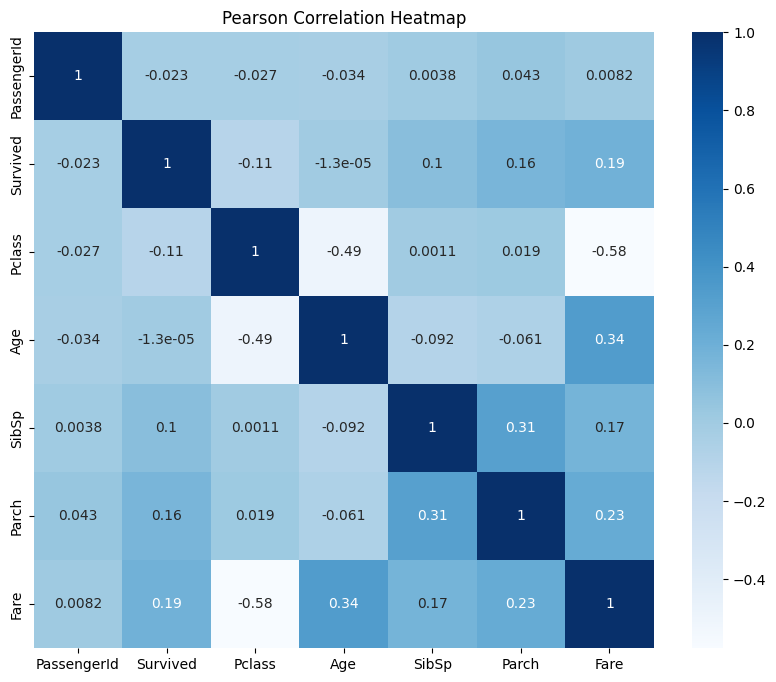

In [11]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.title('Pearson Correlation Heatmap')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

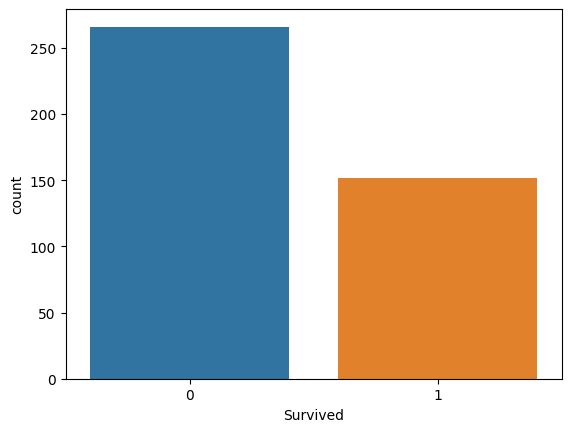

In [12]:
sns.countplot(x='Survived', data=df)

<Axes: xlabel='Survived', ylabel='count'>

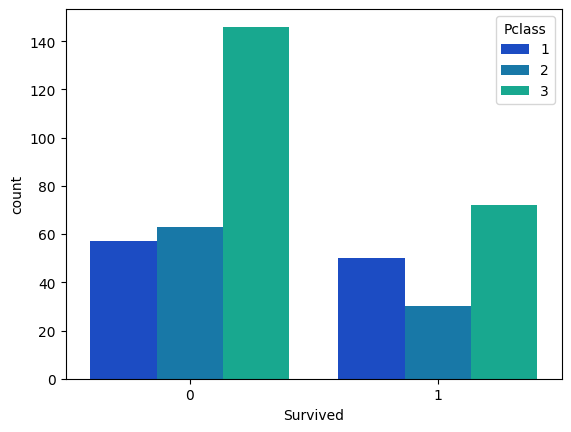

In [18]:
sns.countplot(x='Survived', hue='Pclass', data=df, palette='winter')

In [22]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [25]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,34.5,0,0,7.8292,Q
1,1,3,female,47.0,1,0,7.0000,S
2,0,2,male,62.0,0,0,9.6875,Q
3,0,3,male,27.0,0,0,8.6625,S
4,1,3,female,22.0,1,1,12.2875,S


In [27]:
df.dtypes

Survived      int64
Pclass        int64
Sex          object
Age         float64
SibSp         int64
Parch         int64
Fare        float64
Embarked     object
dtype: object

## Check the distribution of numerical variables

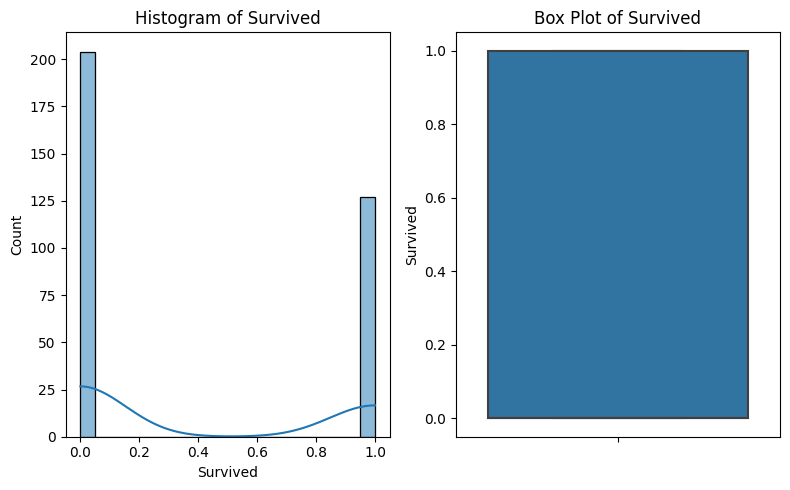

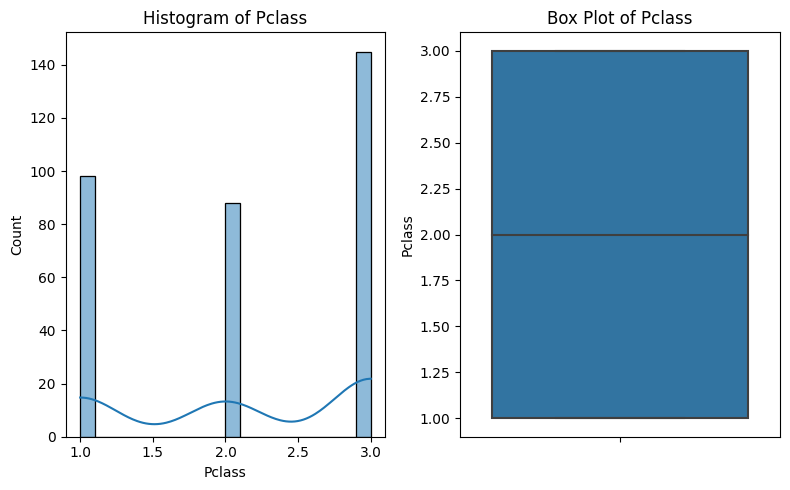

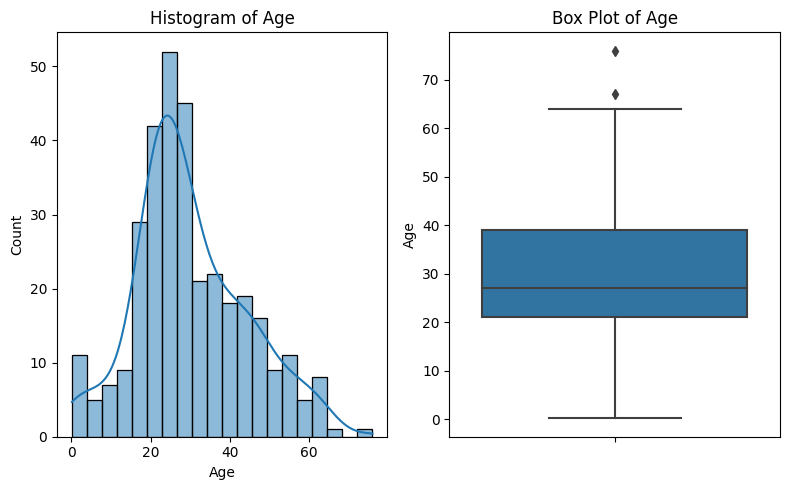

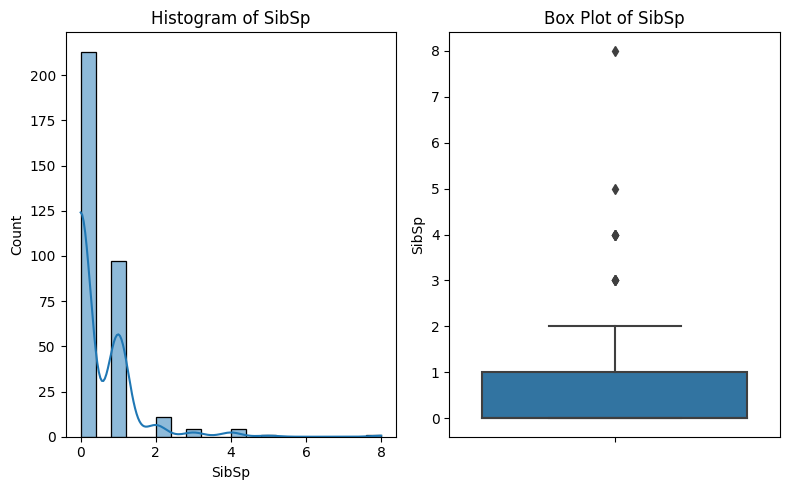

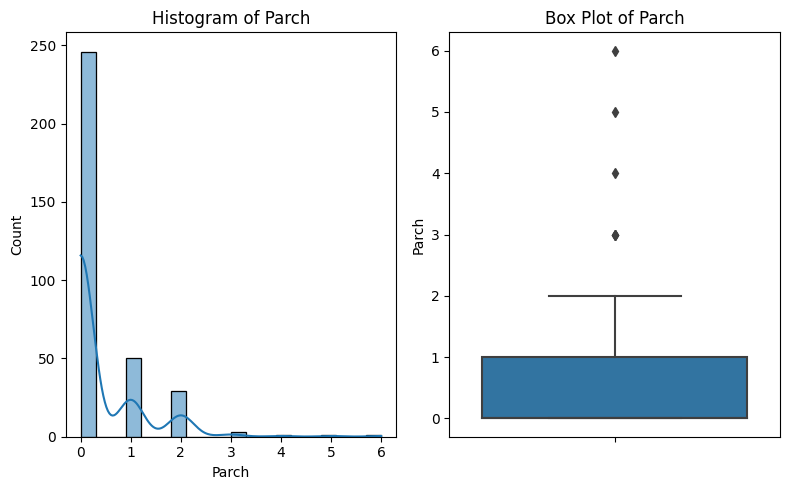

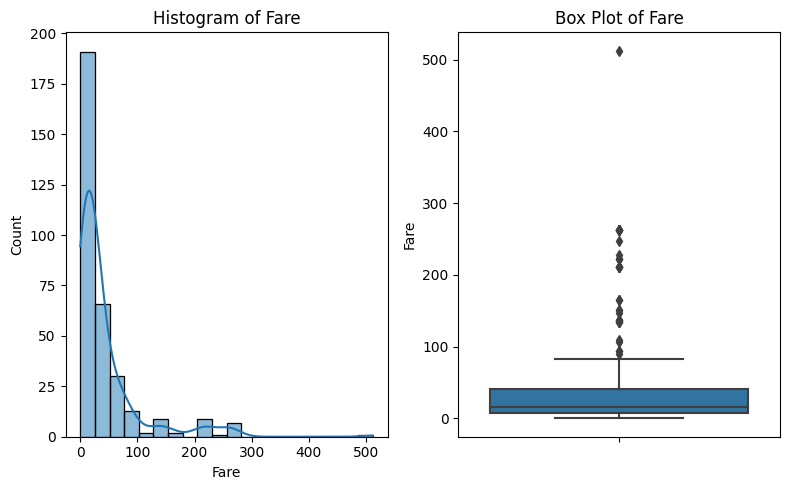

In [31]:
for column in num:
    plt.figure(figsize=(8, 5))

    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=column, bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()

## Outlier Analysis

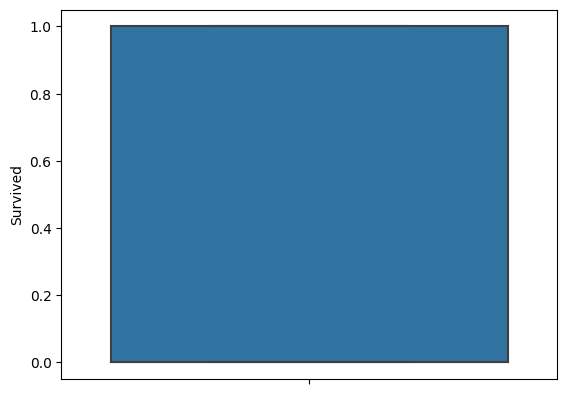

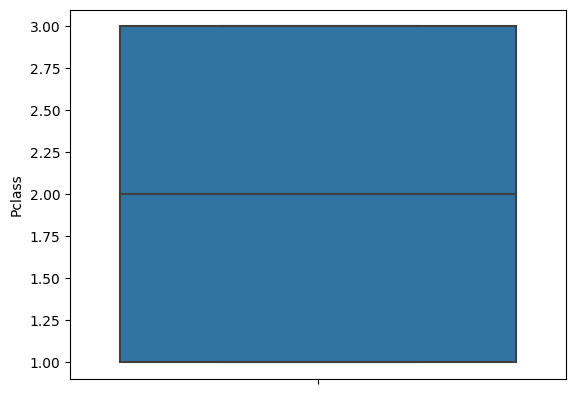

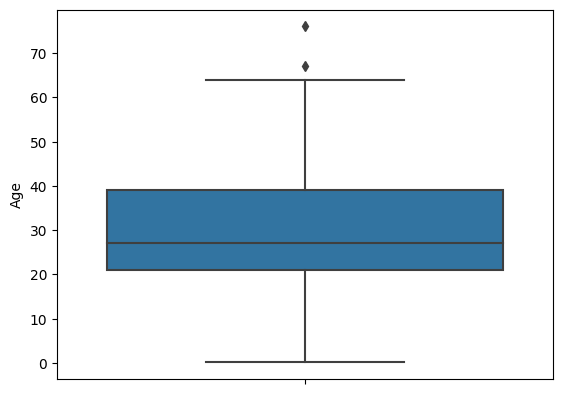

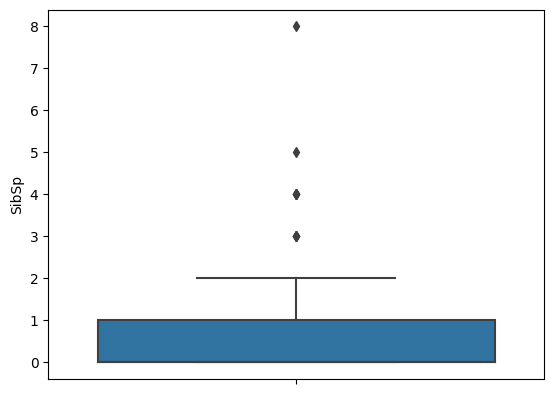

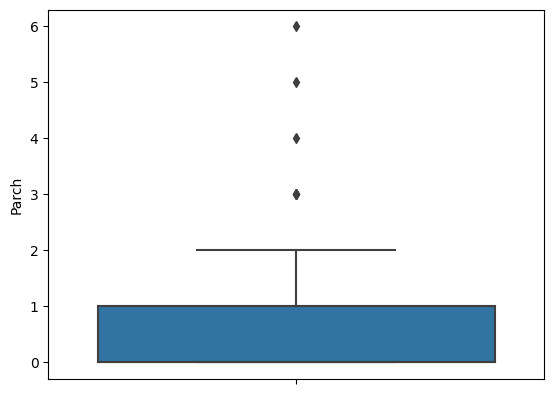

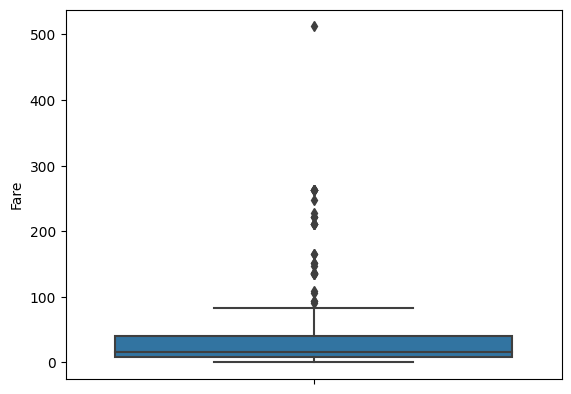

In [32]:
for i in num:
    plt.figure()
    sns.boxplot(data = df, y = i)

In [33]:
for i in num:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3-q1
    ul = q3 + (1.5*iqr)
    ll = q1 - (1.5*iqr)
    
    for j in df[i]:
        if j>ul:
            df[i] = df[i].replace(j, ul)
        elif j<ll:
            df[i] = df[i].replace(j, ll)

## Perform Bivariate analysis

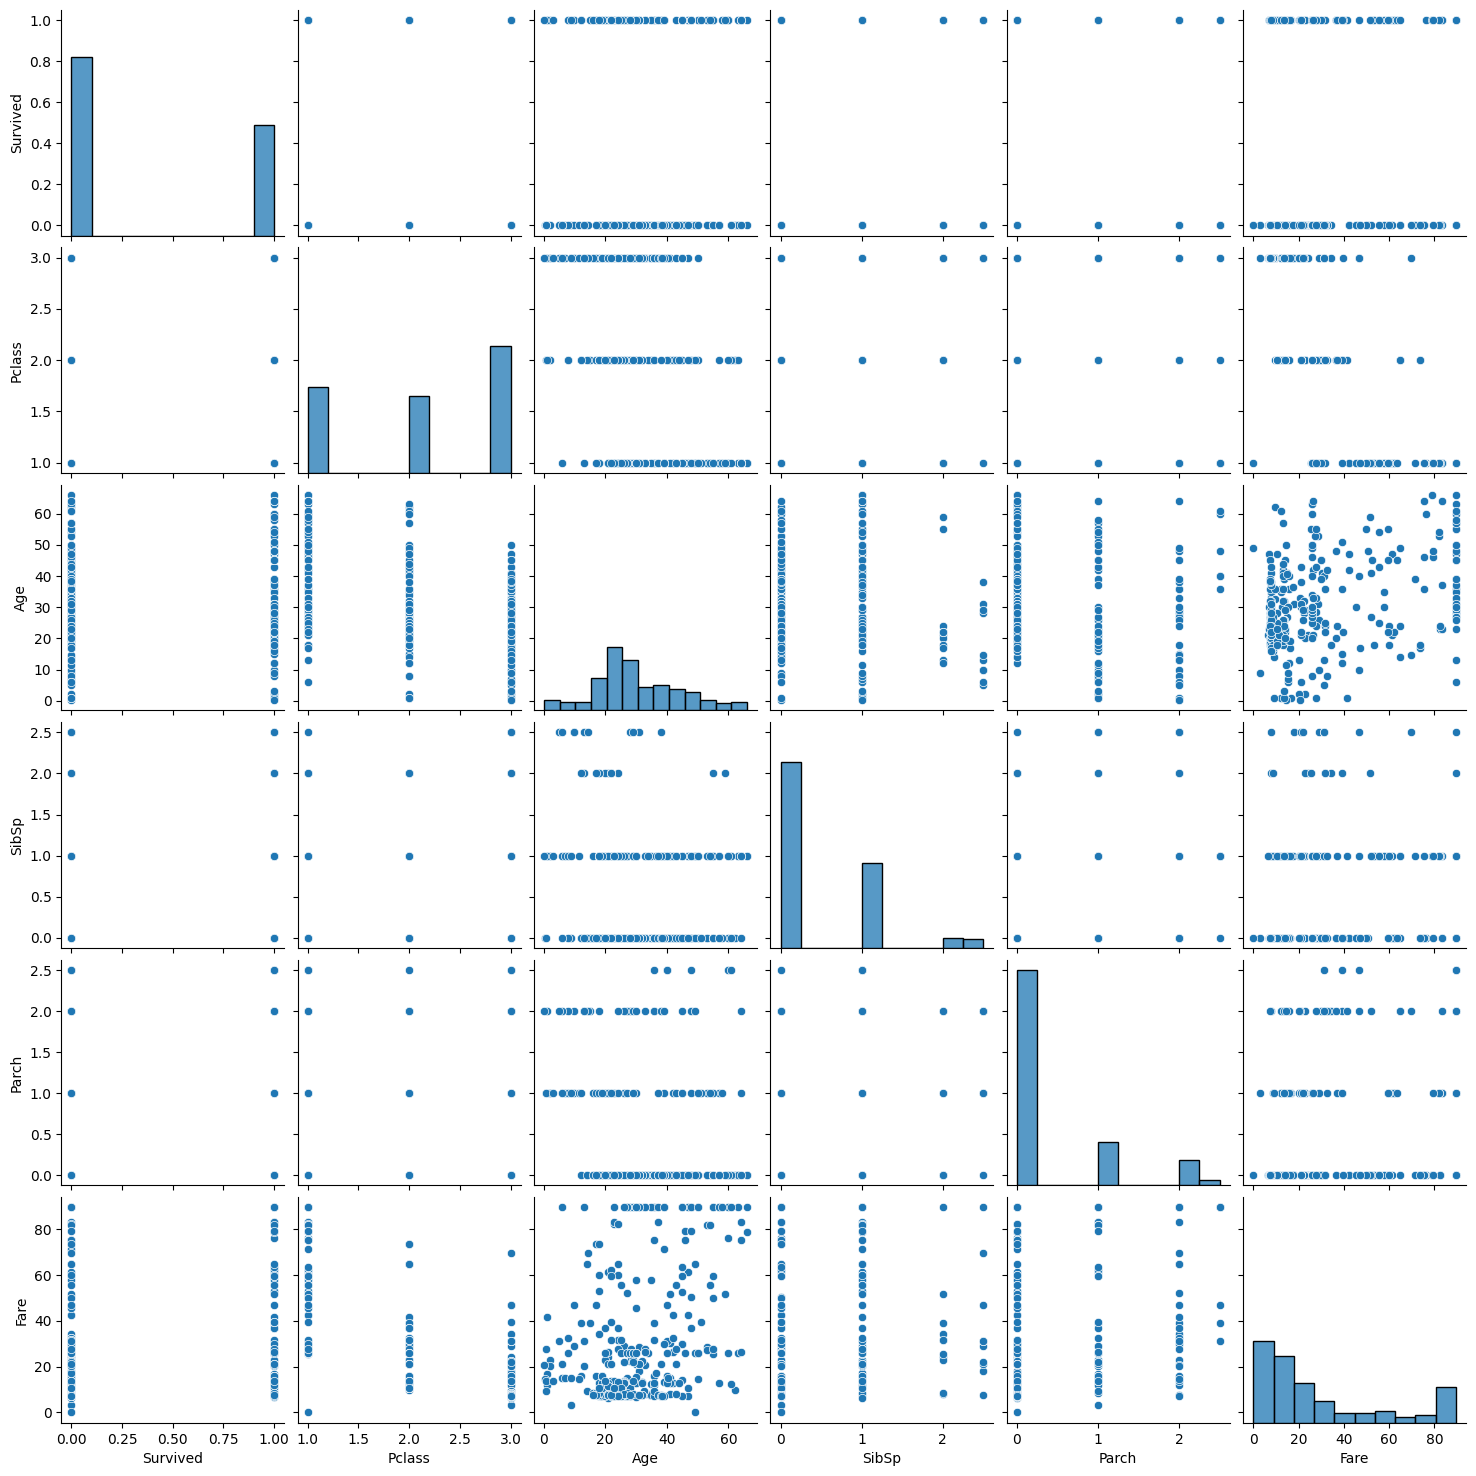

In [35]:
sns.pairplot(df)
plt.show()

## Encoding

In [149]:
le=LabelEncoder()

In [38]:
df["Sex"]=le.fit_transform(df["Sex"])

In [39]:
df["Embarked"]=le.fit_transform(df["Embarked"])

In [40]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,34.5,0.0,0.0,7.8292,1
1,1,3,0,47.0,1.0,0.0,7.0000,2
2,0,2,1,62.0,0.0,0.0,9.6875,1
3,0,3,1,27.0,0.0,0.0,8.6625,2
4,1,3,0,22.0,1.0,1.0,12.2875,2


## Split into train and test set

In [41]:
X=df.drop('Survived',axis=1)
y=df['Survived']

In [168]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=5)

## SVM

In [169]:
SVM = svm.SVC()

In [170]:
SVM.fit(X_train, y_train)

SVC()

In [171]:
SVM.fit(X_train,y_train)
pred = SVM.predict(X_test)
print(pred)

[0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


In [172]:
metrics.accuracy_score(pred, y_test)

0.63

## Decision Tree

In [173]:
DT = DecisionTreeClassifier()

In [174]:
DT.fit(X_train, y_train)

DecisionTreeClassifier()

In [175]:
DT.fit(X_train,y_train)
pred = DT.predict(X_test)
print(pred)

[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0]


In [176]:
metrics.accuracy_score(pred, y_test)

1.0

## Random Forest

In [177]:
RF = RandomForestClassifier()

In [178]:
RF.fit(X_train, y_train)

RandomForestClassifier()

In [179]:
RF.fit(X_train,y_train)
pred = RF.predict(X_test)
print(pred)

[1 0 1 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 0 0 0 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0
 0 0 0 1 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 1 0]


In [180]:
metrics.accuracy_score(pred, y_test)

1.0

## Logistic Regression

In [181]:
lr = LogisticRegression()

In [182]:
lr.fit(X_train, y_train)

LogisticRegression()

In [183]:
y_pred = lr.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

In [184]:
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

1.0

## Prediction on random data

In [185]:
predict = pd.DataFrame({
    'Pclass': [1],
    'Sex': [1],
    'Age': [47],
    'SibSp': [0.0],
    'Parch': [1.0],
    'Fare': [8.57],
    'Embarked':[1]
})

predicted_species = lr.predict(predict)
print("Survival:", predicted_species)

Survival: [0]
